<a href="https://colab.research.google.com/github/Behls/data-anayltics-uhi/blob/main/19016467_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Student & UHI Submission Details**

**Name:** Alanna Zimbehl  
**Student ID:** 19016467  
**Module:** Data Analytics on the Web  
**Assignment:** Assignment One - Data Science (R)

---


# **Introduction**

The purpose of this notebook is to take you through a journey, of gathering and cleaning data, identifying trends using machine learning and data analysis techniques using R and to critically evaluate key indicators of related data which will then be used to train various models using machine learning techniques in part two of this assignment. 

### **Project Outline**

The brief of the project is to analysis the relationship between weather patterns and the number of collisions to manage emergency service staff more efficiently. The goal is to be able to predict the number of collisions on any date using two different types of machine learning models, such as linear regression and neural networks. The aim is to make predictions on the potential number of collisions on any day during any time period, which will allow the emergency services to allocate resources more efficiently.

### **Technical Information**

The project as a whole is split into two sections, the first section being mainly focused on data science techniques, which include gathering data, cleaning that data and further investigating corellations using different visualisation techniques and algorithms. 

**This would be achieved using the following libraries and languages:**

- R (Statisitcal Language for Data Science)

The second section would mainly be focused on using that data to train models using vairous different types of models and experimenting with hyper paramters and features to analysis the models ouput.

**This would be achieved using the following libraries and languages:**

- Python
- Tensorflow
- Numpy


Lastly, throughout the project, snippets of code or library install commands  may be available through the cells, which can install packages for the notebook to utilise. They would be typically noted using '!' or '%' magic commands. For more information on magic commands check out this [article](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.03-Magic-Commands.ipynb). (Vanderplas, 2016)



# **Methodology**

The methodology section will achieve the following objectives:

- Process of gathering data from online sources
- Cleansing data - making fair assumptions and process of finalising the dataset to use to train machine learning models.
- Identify related data and features - using different forms of analysis 
- Experimenting with models to make accurate predictions for the number of collisions on a given day.

---
# Gathering Data

For this project, data will be retrieved from Google services such as Big Query. The goals for this project is to determine if weather can effect the number of collisions on a particular day, and attempt to predict the number of collisions on a given day. This would allow for emergency services to understand potential trends, and make their responses more efficient. 

---

##Datasets 

Two particular datasets have been narrowed down for this project, firstly the New York Collisions and  secondly Weather Data over a period of time both of which are available free through public dataset option on Google Big Query.


**Weather Data from 2012 to 2020**

This dataset includes historical data features over a period of time, data such as fog, temperatures, windspeed, wind gusts, percipitation and much more. For this project it has plenty of features to analysis for trends between differnt weather patterns and the number of collisions.

**New York Collisions**

This datasets includes data features on collisions within new york, features such as co-ordinates of the accident itself, timestamps and more. This is ideal as it would allow for analysis of locations alongside the date of the accidents; it aids in finding more trends alongside weather, location and time of year.

---

##Understanding the Data

This notebook contains data from a collision dataset, and a weather dataset.

Firstly the features extracted from the collision dataset are relatively simple, mainly being the dates and the number of collisions for each date within that time period. Furthmore each date was broken down into their individual values and a function was applied to determine what day each date was. For example, using integer values to specify if it was a thursday or a monday etc.

However, the features needed from the weather dataset required further research to best understand exactly what data would be required. Each feature is a very specific aspect in regards to climate, weather and so forth. The weather dataset is a collection of historical forecast data, collected from various stations around the world using sensors, satellite imagery and radar data where then meteorologists can then form forecasts. (Rutledge, 2022)



###**Digging Deepering into Weather**

Since the weather dataset is populated by historical data and forecasts, it falls under the umbrella of meteorology which in essence is a type of science that focuses on forecasting based on climate and atmospheric data. Forecasts are created using mainly radars and satellites. Satellites are able to track patterns in weather over an entire region as well as being able to orbit the planet monitoring storm activies, cloud formations and much more. Satelitte images can provide insight to cloud formations which can then in turn inform meteorologists of percipitation in a region. Another tool used in weather stations around the world is the Doppler Radar, which measures wind speed and direction within the local area. It's commonly used to record wind data which in turn can help forecast potential storms or tornadoes. There are many more tools utlised, sensors and cameras can map an area and then continously monitor and record any changes to the depth of the maps which can include snow which then forecasts snow depth and fall. (Rutledge, 2022)

Furthermore forecasts can include the following information over a time period:
- Temperatures - forecasted highs and lows 
- Windspeed
- Wind Gusts
- Wind Direction 
- Percipitation - likely hood of percipitation and type (rain, snow or hail)
- Humidity
- Visibility - range of visibility
- UV

Historical forecasts contain much more data as some types of data can only be collected once the weather event has passed for example snow depth which may only be collected after it has snowed rather than before or during.

However many services use data collected to make long term forecasts typically over a few weeks. These are more likely to be predictions based on that data collected.

![Example of weather forecast](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/weatherforecast_example.PNG?raw=true)


Fig 1. Example of a Weather Foreact - Metoffice. (Metoffice, 2023)

---

##Technical Details

Firstly much of this information is available as a taught component for the assignment, however for the purpose of the notebook its worth noting technical details and feature select to aid with the analysis of the overall data. 

Additionally all code for the assignment will be hosted on [github](https://github.com/Behls/data-anayltics-uhi).

---


###Querying Datasets 

To begin, the following query was used to find all data within the collision dataset and limit the return results to 1000, as it was primarily to see what data is available for each column.

```
select * from bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions limit 1000;

```

![collision query results](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/collision_query_results.png?raw=true)

As you can see illustrated above is a snapshot of some data returned by the query, it is useful to pull all data and limit the query to further understand which data could be useful and which can be disregarded. It aids in making more precise queries which can also be filtered to remove redundant records, which would be rows that contain null values for example. 

Very quickly its obvious that there are quite a few null values in the dataset, it's a fair to assume that when records are created either data isnt available to store, or there simply can be human errors on the data entry side. These are the values that would need to be analysised and potentially removed from the final dataset for training and testing models.

Finally from this particular dataset, the following columns (data features) are selected:

- *timestamp* - this column stores the data a collision has occured, it would be required to predict the number of crashes on a given day/date/year 
- COUNT function to count the number of timestamps (dates) where a collision has been recorded. This will be renamed as a value called *num_collisions*  

It is worth noting these values would be grouped by *num_collisions* so there's a single record for each date with the total number of collisions. Further more another query will be used to get the longitude and lattitude data which will determine the location of the collision and could be analyside to determine any relationships between the number of collisions and the location.


Then the following query was used to find all data within the weather dataset from 2012 and limit the return results to 1000, as it was primarily to see what data is available for each column.


```
select * from bigquery-public-data.noaa_gsod.gsod2012 limit 1000;

```

For this dataset there are many versions collated arranged by year, so for this project it would require weather data from 2012 to 2020. As the data is relatively the same in each dataset, it's a case of querying each individual dataset, from 2012 to 2020 and combining each view to create one large dataset of all the data for those eight years.  

![weather query results](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/weatherdata_2012_query_results.png?raw=true)

Like the collision dataset, the following columns (data features) will be selected to further anaylse which are:

- *year* - year recorded.
- *mo* - month recorded.
- *da* - day recorded.
- *temp* - mean temperature recorded on the day in (F).
- *dewp* - mean dew point for the day recorded in (F).
- *slp* - mean sea level pressure for the day recorded in millibars.
- *visib* - mean visibility for the day recorded in miles.
- *wdsp* - mean windspeed for the day recorded in knots.
- *mxpsd* - maximum windspeed recorded for the day in knots.
- *gust* - maximum wind gust recorded on the day in knots.
- *max* - maxmimum temperature recorded on the day in (F) however recordings can vary for the day.
- *min* - minimum temperature recorded on the day in (F) however recordings can vary for the day
- *prcp* - total percipitation recorded for the day in inches (inluding rain and/or melted snow) - it is worth noting this may not be a full 24 hour observation but rather a partial observation over a few hours.
- *sndp* - snow depth recorded for the day in inches however if there are multiple measurements recorded, the last report will be stored for the day.
- *date - CAST function* - taking the first three column values day, month and year and cast them as int values and concate them into one value which will be named as date. This will essentially combine the three values. 

**Handling Missing Data**  
As mentioned previously that it was noticed that there was null values in the collision dataset, this is also present in the weather dataset. For the sake of stream lining the process its worth noting how each dataset handles missing values. At this stage it's a case of noting how each column records missing values which can be removed during the data cleansing process. Thankfully in BigQuery each dataset has a schema of which it details what data type each column is, alongside how it records missing values. 

For the purpose of keeping the process simple, at this stage it will be a case of collating all the required columns and data into one large dataset, and from there data values can be removed either through excel, code or bigquery. It's worth noting if using bigquery it will require many queries and conditions to fully remove redundant and missing data. However another option would be to use excel but this would create a huge dataset to clean in a more manual form and requires more local machine resources to do so.

**Important Note**  

Complete set of queries can be found on [github](https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/BigQuerySQL/SQLQueries) where it does list all the queries used to create various views, selecting data form both datasets which can be used in the next section, which would be to study and clean the data for analysing.

For the next section of the report both datasets can be found on github in their raw forms. These links will be the uncleaned datasets, once the datasets have been anaylised and cleaned the datasets will be seperately uploaded to anaylse with R.
- [Data set including co-ordinates]()
- [Data set without co-ordinates](https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/uncleaned_data/collated_data.csv)



##Data Cleansing
The data cleansing stage is where you begin to look at the datset as a whole and decide which values are not required or which data needs to found. As mentioned previously the dataset has a system for recording missing values, or recording 0 as a value. Missing values can be entered as null or 0, or it can have a specified value to indicate a missing value which would be typically stored in the schema. As an example, looking at the *gust* feature if the value is missing then the record of 999.9 would be entered for that particular day.


At this stage, there isn't a need for indepth knowlege of how weather data is recorded or the use of it's terminology however it's best to have a degree of insight, as each value recorded can effect another. 

By having a slight insight to how weather data is recorded and what each feature means how it can effect other features are dependant on each other.It will provide a degree of insight. This could be underestanding exactly what percipitation is for example, it would then inform and help spot errors in data. For example if it was recorded 0 for percipitation on a specific day, and the station recorded 0 or 999.9 *(Remember according to bigquery the station uses the value 999.9 for missing data or recording 0's)* by looking at the temperatures recorded where too high then it's safe to assume that there was no snowfall for that day however if there was no percipitation recorded but there was a recorded value for snow depth then its likely its an error as percipitation is the recorded value of moisture which includes snow, hail, sleet and rain. However the data will help inform proper assumptions which should in turn make for more accurate results. It will also help with spotting trends, weather patterns and so on.

##Loading the Datasets

There are two parts to this section first being loading the datset into the notebook and using built in functions to provide summaries on each column on the dataset, and secondly decided which data is useful or redundant. This could be in the form of relations with other data, or making assumptions which will then affect how redundant data is used.

First need to retrieve the table from bigquery to provide the collated data:

```
select * from uhi-assignment1.assignment_one.collated_collision_data;
```

Which returns the following data: 

![collated results](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/collated_data.png?raw=true)


Following on from this, a CSV file will be downloaded locally to review and a raw version will be available on [github](https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/uncleaned_data/collated_data.csv)

In [8]:
#data is loaded from github in its raw form and stored in the data variable.
data <- read.csv('https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/uncleaned_data/collated_data.csv')
# loading dataset into the head function - provides first few rows in a dataframe format 
head(data)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,num_collisions
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,2018,11,20,2018-11-20,48.2,46.3,1012.0,9.2,7.0,19.0,25.1,52.0,43.0,0.00,999.9,0,695
2,5,2018,6,22,2018-06-22,61.1,56.4,1016.4,5.5,7.2,13.0,999.9,69.1,55.9,0.11,999.9,1,728
3,5,2018,3,2,2018-03-02,45.3,45.2,989.8,5.1,23.3,49.0,65.1,48.9,39.0,0.35,999.9,0,884
4,6,2018,4,28,2018-04-28,49.5,48.3,1010.7,5.1,6.3,9.9,999.9,60.1,39.9,0.13,999.9,1,604
5,6,2018,6,23,2018-06-23,59.2,57.0,1015.5,5.7,9.2,14.0,20.0,69.1,55.9,0.16,999.9,1,513
6,5,2018,2,16,2018-02-16,44.8,44.6,1003.8,2.9,8.8,18.1,26.0,52.0,37.9,0.14,999.9,1,582


Then load the dataset using R's built in functions to read csv files by passing in the raw data link as a paramter and stored in a variabled named *data* . From there the data can be passed into other packaged functions, such as summary and head. Head provides the first few rows of a dataset in a datafrom format, whereas summary provides more statistical information on each column, including min and max values, mean values etc. These functions, especially summary are great for providing fast and accurate information, without having manually code or find these points through excel for example. Straight away there are a few indicators to rendundant and useful information within the dataset as well as likely relationships between data. 


In [ ]:
# summary function -> takes in dataset as an argument.
summary(data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

The summary funtion returns specific values for each column within a dataset. This includes min and max data which are the lowest and highest values in that features column. Additionally it includes the mean and median, which is middle and average values for that feature. Finally it also returns data on 1st and 3rd quantiles in that features column.

---

**Observations from Summary Data**

Handling of missing data for various attributes look like they could return contridicting results, the maximum value prcp attribute for example has 99.9 which is the stored value for any missing entry, this could appear in the model that infact on that day there was a large amount of percipitation when in actuality theres not. As the min value for prcp is 0, it is likely this data was not entered which could be down to human error. 

From the summary there are a few features that have questionable recorded values.
1. Snow depth only has one recorded entry of snow over a eight year period. This is highly unlikely as there are documented snow storms in that time period that span over a few days. It has a low min value and a very high max value, with the mean being closer near identical to the max values which in turn confirms this theory. 

2. Percipitation has a max value 99.99 which indicates a missing value according to the datasets schema. With percipitation, if there is non its recorded at 0, if there is then a value should be recorded as percipitation usually indicates rain, snow, hail, or sleet. 

3. Max Windspeed also has recorded max value of 999.9 which is more difficult than the other features as its highly unlikely as this is the maximum windspeed on a given day. Days with no wind are rare.

4. Gust is the recorded speed of a sudden burst of wind, it's usually more forcecful than the recorded wind through the day. There can be instances of no wind gust on calm days, however the summary indicates the max value being 999.9 which again indicates records with missing data. It is impossible to have wind gust speeds at the value as that would be 1150 mph which isnt even possible during the worst storms recorded. According to the Mount Washington Observatory the fast gust of wind ever recorded was 231 mph. (Mount Washington Observator, 2023)

5. Dewp is the temperature point where moisture is likely to vapourise. It is a value based on current temperatures of the day, therefor there technically should be a value recorded for each day. According to the summary the maximum value recorded is 9999.9 which indicates a likely error as refering back to the schema this is the same value recorded for missing data. It's also highly unlikely as that would be 9999 Farhrenheit or converted it would be 5537.222 celcius which is impossible as a recorded temperature.

6. Sea Level Pressure is a feature which records the value of atmospheric pressure at the mean sea level. According to the summary the max value stored in the dataset is 10000 mbar which could be hidding missing recorded values. upon further inspect there are two records returned with values of 9999.9. Refering back to the schema, 9999.9 is the value to used to record missing sea level pressure measurements. According to Arizona State University the lowest value of sea level pressure recorded was 870 hPA(otherwise known as hectopascal) which converted to millibars is 870 mbar. Alongside the fact that summary data shows the minimum value recorded is 989 mbar, its impossible to have values recorded at zero therefor the missing values are likely down to human error. (Arizona State University, 2023)

These are the features to focus on for cleaning the dataset, as they include large amounts of missing data, through analysis it will be decided which data is relevant, as well as finding data from other datasets to supplement to the missing values.

In [ ]:
# overview of the attributes in the dataset 
str(data)

'data.frame':	3106 obs. of  18 variables:
 $ day           : int  2 5 5 6 6 5 5 1 1 5 ...
 $ year          : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ mo            : int  11 6 3 4 6 2 7 8 8 11 ...
 $ da            : int  20 22 2 28 23 16 27 13 20 16 ...
 $ collision_date: chr  "2018-11-20" "2018-06-22" "2018-03-02" "2018-04-28" ...
 $ temp          : num  48.2 61.1 45.3 49.5 59.2 44.8 70.6 69.1 66.7 42.8 ...
 $ dewp          : num  46.3 56.4 45.2 48.3 57 44.6 70.1 68.1 66 39.1 ...
 $ slp           : num  1012 1016 990 1011 1016 ...
 $ visib         : num  9.2 5.5 5.1 5.1 5.7 2.9 2.1 7.7 4.7 5.5 ...
 $ wdsp          : num  7 7.2 23.3 6.3 9.2 8.8 7.8 6.2 11.6 19 ...
 $ mxpsd         : num  19 13 49 9.9 14 18.1 13 9.9 15.9 31.1 ...
 $ gust          : num  25.1 999.9 65.1 999.9 20 ...
 $ max           : num  52 69.1 48.9 60.1 69.1 52 75.9 75.9 72 53.1 ...
 $ min           : num  43 55.9 39 39.9 55.9 37.9 68 64.9 66 35.1 ...
 $ prcp          : num  0 0.11 0.35 0.13 0.16

Using the str() function provides an insight of the attribute types as well as returning the first few values in that column. It's ideal as it gives a better understanding of how to handle that data and how it can be manipulated later.  



In [ ]:
#applies a function, which returns the length of a column, not including missing values.
apply(data, 2, function(x) length(which(!is.na(x))))

day           year             mo             da collision_date 
          3106           3106           3106           3106           3106 
          temp           dewp            slp          visib           wdsp 
          3106           3106           3106           3106           3106 
         mxpsd           gust            max            min           prcp 
          3106           3106           3106           3106           3106 
          sndp            fog num_collisions 
          3106           3106           3106

Finally using the apply function to take in the dataset, and apply a function 
to each column in the dataset, which is to essentially check for the length of the columns and return that value where the values are not null. As we can see from above, all the columns return the same length and there are no missing values, however that doesnt rule out data being incorrectly recorded.


##General Observations and Assumptions

At this stage it's wise to make general assumptions, it creates a baseline of which features to analyse and compare against the predicting value in this case the number of collisions. They can be then used throughout the results to confirm whether the assumptions where true or not, and conclude any new findings.

###List of Assumptions

1. Its likely that during festive periods of the year there are more likely for more people travelling on the road, this could be case during the summer where people tend to go on holiday the most or during christime period and possible during school breaks. With more people traveling there is a higher chance of collisions.
2. New York City is not only an incredibly busy city but also a tourist destinatin for many people throughout the year, so it's likely to see during certain periods of summer, spring and christmas there will be an influx of people in the city traveling. 
3. Adverse weather can have two effects, more people are likely to travel on a form of transport than for example walk as they don't want to experience bad weather such as rain, which in turn means more people on the road. This increases the chances of collisions. Secondly depending on the weather such as snow it's likely people would be less likely to travel as snow is treacherous and would depend on its severity. If its mild then people are likely to travel however if it's severe with large amounts of snow on the roads then people are more likely to stay at home or not travel at all.
4. Due to the large amounts of missing values entered in the database, these are likely due to human error, or possibly down to being unable to actually record specific data. Example being snow depth, in some areas is requires volunteers to manually record snow depth, whereas others it's done using cameras and sensors. 

###Further Research on Features with Missing Values.

**Snow Depth**  
First noticable attribute is *sndp* which represents snow depth in inches. According to the attribute summary, the maximum value of snow depth is 999.9 whereas the minimum was only 3.9. The mean is 999.6 which can show that most values where recorded at 999.9. To take a further look into this attribute, it can be plotted into a histogram and a scatter plot to identify any outliers (errors). 

To further investigate snow depth attribute, further research was conducted at what likely tempartures we will see snow fall and how that data specifically depth is collected in the United States.

Firstly in the US the National Weather Service partially relies on large group of volunteers of around 8,000 members to provide additional data which they then store within their database such as snow depth. This is collected manually all over the country in various states, using measuring sticks. Volunteers will periodically measure the depth of snow in their area and calculate the average snow depth within inches which is then returned to the national weather service.

Secondly, New york City has periods of snow throughout the winter periods which can been seen as very late October till early March. It's highly unlikely over the period of eight years, New York City only has one reported entry for snow depth.

**Sea Level Pressure**

According to the archives of Airizona State University, the lowest recorded measurement of sea level pressure was 870hPa whereas the highest recorded level below 700m was 1083.8hPa. (Arizona State University, 2023) Therefor within this dataset the values shouldn't realistically sit without these values. 

**Max Wind Speed & Wind Gust** 

The difference between wind and wind gust is usually strength and duration, for example wind can last anywhere from a few seconds to a few minutes and is generally not as strong as a wind gust, where as a wind gust is usually a force of wind, much stronger however it's duration is much less typically up to 20-30 seconds. Both are measured over a period of time, continously by a sensor called anenometer which measures the windspeed over a period of two minutes and records the average wind speed from that. (Adame, 2020)

**Dew Point** 

Dew point is a value which directly effects the humidity in the air, as its the temperature the air needs to be cooled at to begin to form vapour. The higher the dew point means the more moisture in the air, typicallt this value is seen as a percentage in weather forcasts. An example would be if the temperature was 30c and the dew point was 27c that would mean there is 84% relative humidity. Essentially the higher the dew point, the more humidity increases which in turn creates more moisture in the air and effects how comfortable it is for people on a given day. (National Weather Service, 2023)

The calculation for working out relative humidity as follows: 

![relative humidty](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/humidity_calculation.png?raw=true)  
Fig 2: Formula for calculation relative humidity. 

**Percipitation**

Percipitation is the forming of vapours in the atmosphere which then falls back down to the ground, this could be snow, hail, sleet or rain. It begins usually over the ocean, where the earth warms the water which in turn creates water vapour which then rises to form clouds. As this is forming percipitation can happen, where depending on the temperature in the clouds will usually form ice-like crystals and when heavy enough fall back to the ground. Depending on the temperature the form of these crystals can vary as rain, hail, snow or sleet. Throughout the dataset there are records of little or no percipitation as expected however for missing values recorded there are records of 999.9 which signifies a huge amount of percipitatin on that day or down to human error it was not recorded. (National Geographics, 2023)

---

**Conclusion**

In conclusion it appears that most the missing values are likely entered by error, and is likely that there will be found using external datasets. This would likely improve the overall dataset for training the models as removing a large amount of missing data from the dataset would actually result in less training data which therefor effects the accuracy of the predictions made by the models.

#Analysing Missing Values

In [9]:
# storing all column values in variables - this is more of a preference - it feels easier to use and manage throughout 
# the project instead of calling data variable and then the column value.
snow_depth <- data$sndp
num_collisions <- data$num_collisions
day_id <- data$day
day <- data$da
month <- data$mo
year <- data$year
temp <- data$temp
max_temp <- data$max
min_temp <- data$min
windspeed <- data$wdsp
gust <- data$gust
sea_level_pressure <- data$slp
dewp <- data$dewp
max_windspeed <- data$mxpsd 
percipitation <- data$prcp
fog <- data$fog
collision_date <- data$collision_date
visibility <- data$visib

Storing the column values in new variables is a technical preference, for analysing the first dataset from github. This dataset will be uncleaned and will contain all data as is untouched from big query.

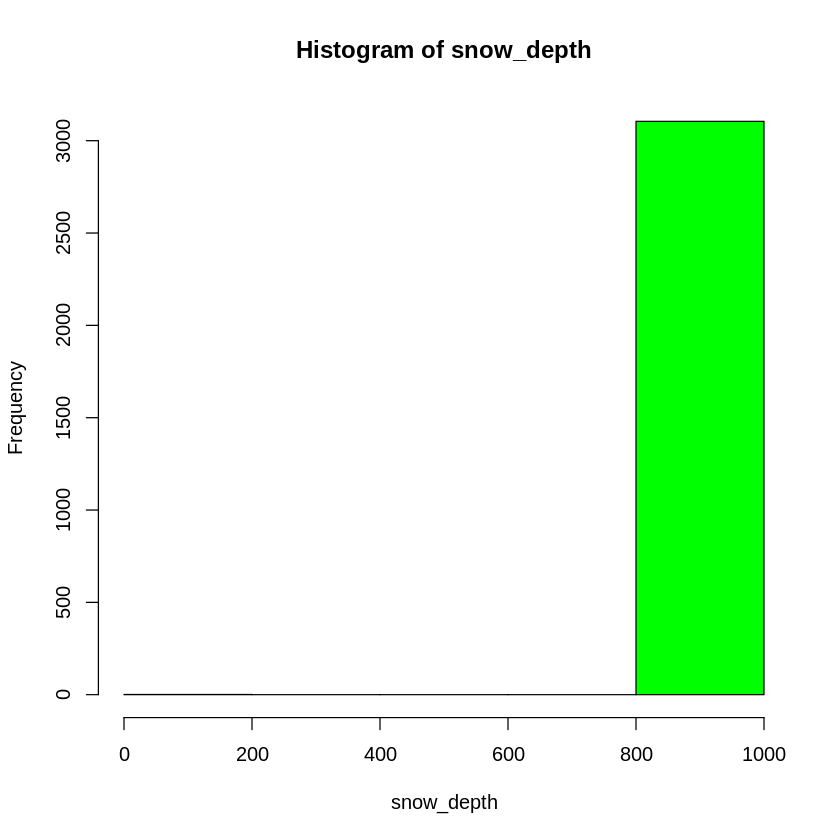

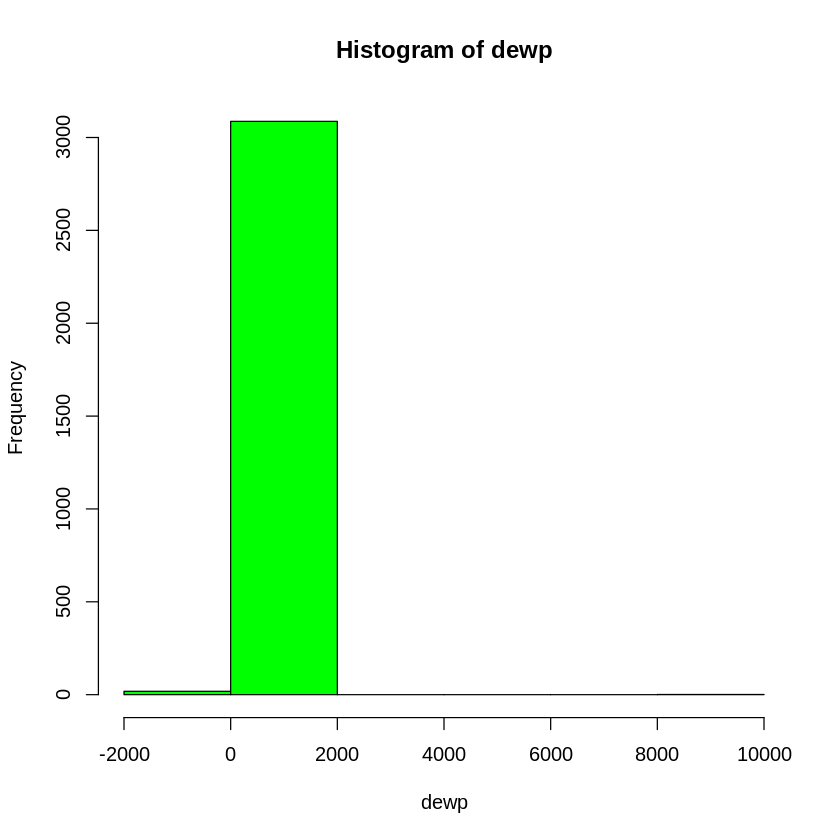

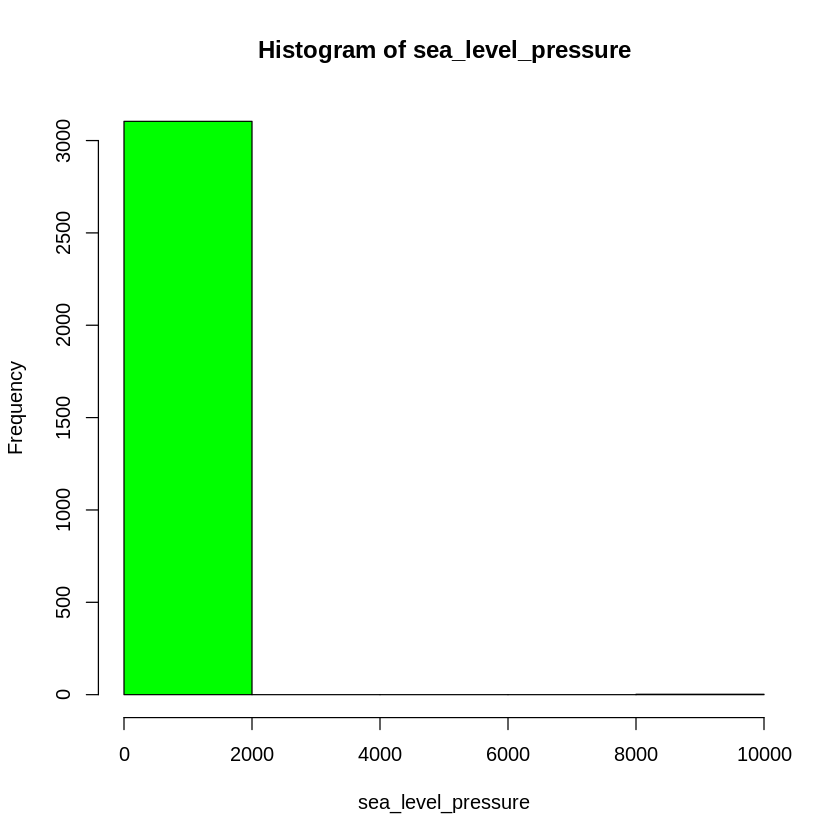

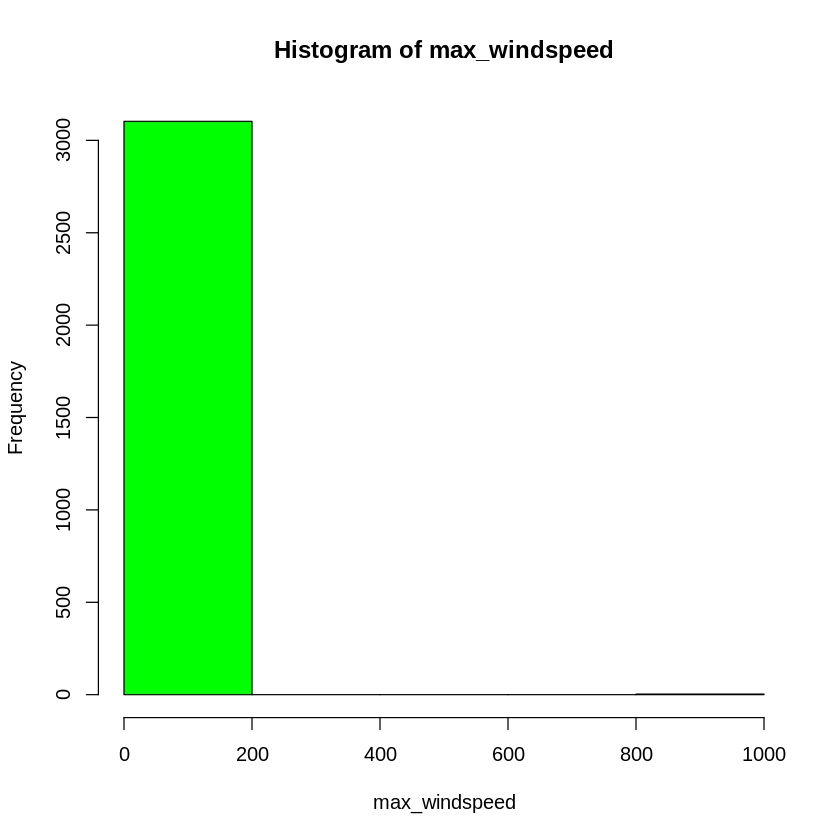

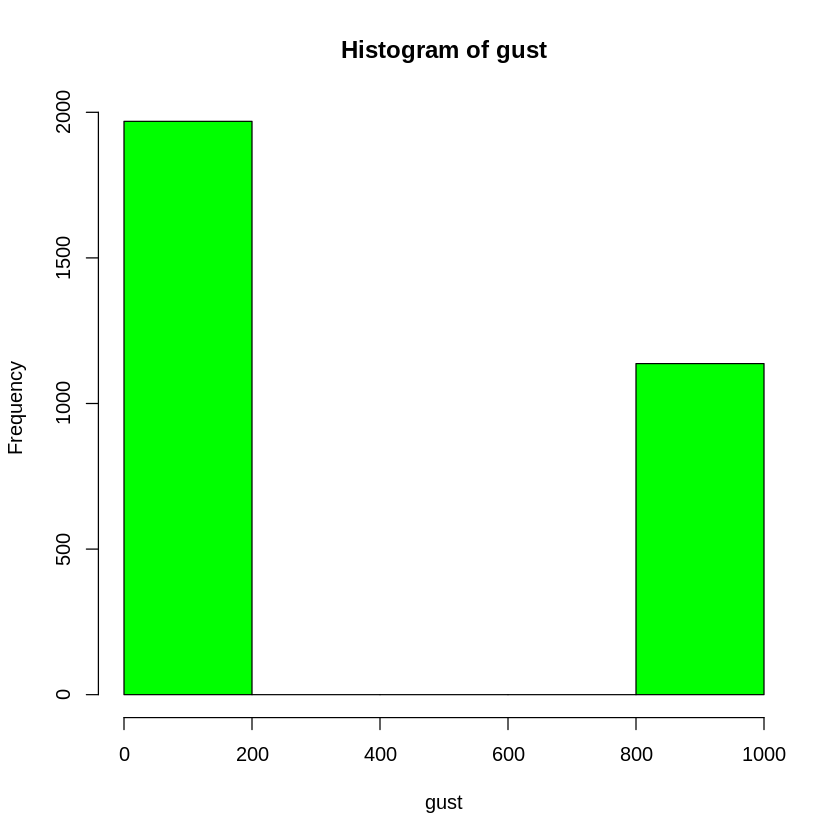

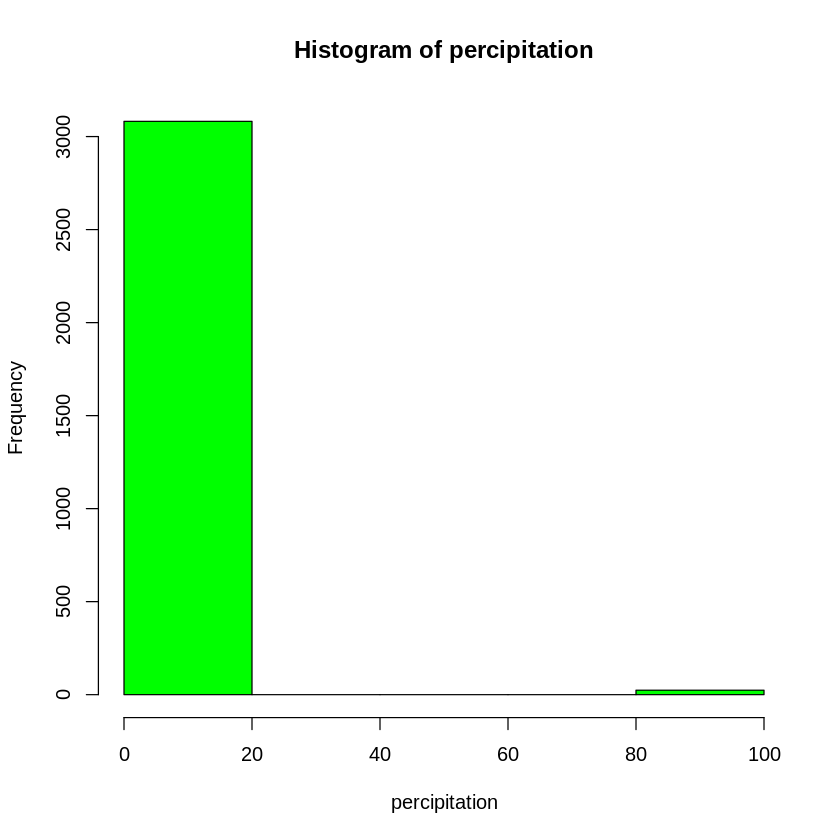

In [27]:
#using historgram to check for frequency of missing values in a dataset
hist(snow_depth, breaks=5, col="green")
hist(dewp, breaks=5, col="green")
hist(sea_level_pressure, breaks=5, col="green")
hist(max_windspeed, breaks=5, col="green")
hist(gust, breaks=5, col="green")
hist(percipitation, breaks=5, col="green")

According to the histograms, snow depth and gust return a large amount of missing data recorded. This appears to look like alot of redundant data however as discovred previously this is likely down to being an error in entered the actual data. It also appears for snow depth that there are very little record of any snow depth being measured. Due to known reports from online articles of snow storms in New York, where large amounts of snow have fallen in short periods, it is likely the snow depth values are errors. Gust on the otherhand looks to be about a third of the actual dataset size. If this was a huge dataset with hundred's of thousands of records it would be appropriate to remove that data however by removing the gust and snow depth missing data would only leave  a single record. Furthermore The snow histogram shows that there is large amounts of recorded snow within the dataset, however this can be decieving as according to the schema on BigQuery, that missing data for snow depth is recorded at the same constant value of 999.9. According to the histogram it shows over 3000 occurances of recorded snow within of around 999.9 inches which infact is incorrect, and appears there is no occurances of any *actual* recorded snow levels in the dataset. This contradicts the summary of the dataset which shows a minimum value of 3.9, therefor by using a scatter plot where it will plot each data point, it may show the single data point that looks non existant on the histogram. It may however look like an outlier. 

The histogram for percipitation shows there are ver little amounts recorded at 80 and above, for this value if there is a missing recorded it's recorded at 99.9 and looks to be very minimal compared to other values. It does however show over 3000 instances of percipitation values between 0 and 20 recorded in the dataset. This is also similar to the maximum wind speed histogram, it shows very little records of missing values recorded however does show over 3000 instances of max windspeed between 0 and 200. Lastly the dew point and sea level pressure histograms also indicates very little missing values recorded in the dataset as they also have over 3000 instances of recorded values and very little recorded high values. 

To try make these graphs more accurate, there are a few options:

1. First need to decide if the snow depth data is relevant to the number of crashes. To do this, the constant value of 999.9 could be changed to 0, more accurately showing that snow depth was not recorded or there was no snow. If so this could be done through excel but quickly changing all but on record in the snow depth column to 0.

2. Compare local new york weather to the dataset. Potentially graph similar records that match closely to the weather data to see if it is likely that the data is missing or there was actually no recorded values for that day.

3. Certain values such as dew point and sea level pressure where their values are usually always recorded or such as sea level pressure where it is impossible to be 0, it woukd be possible to find these values, otherwise because there are so little incorrectly recorded they could be removed from the dataset. This should be only be considered if the data cannot be found.




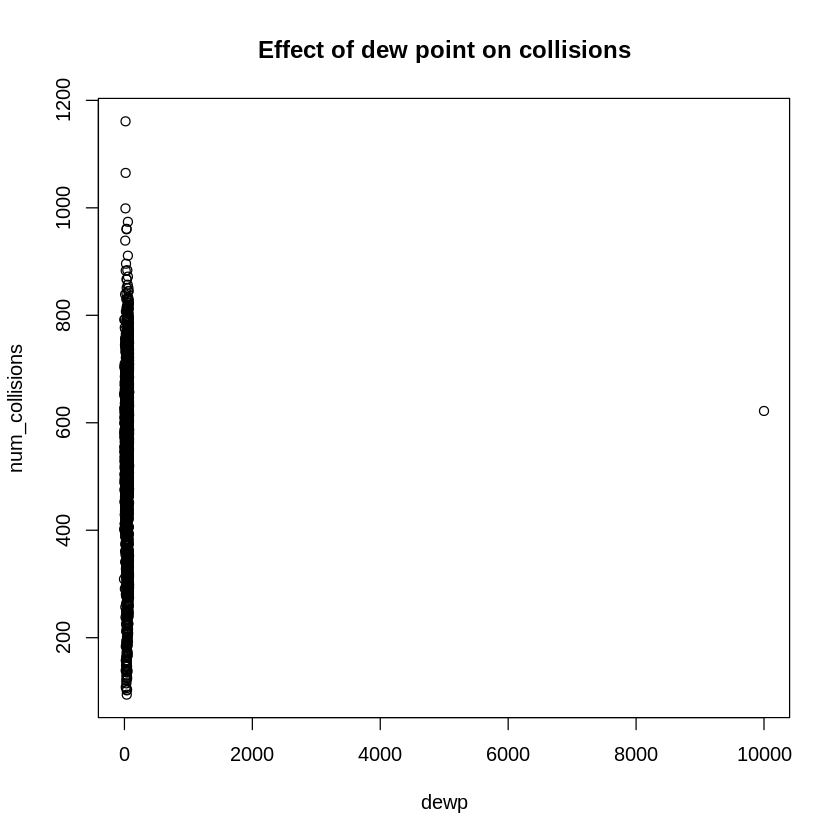

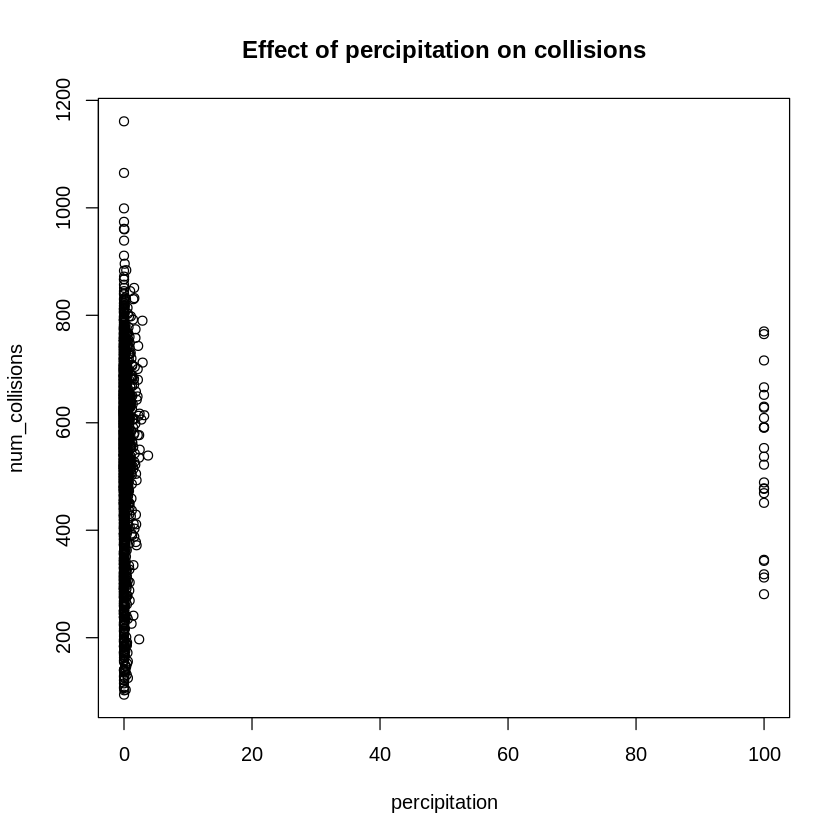

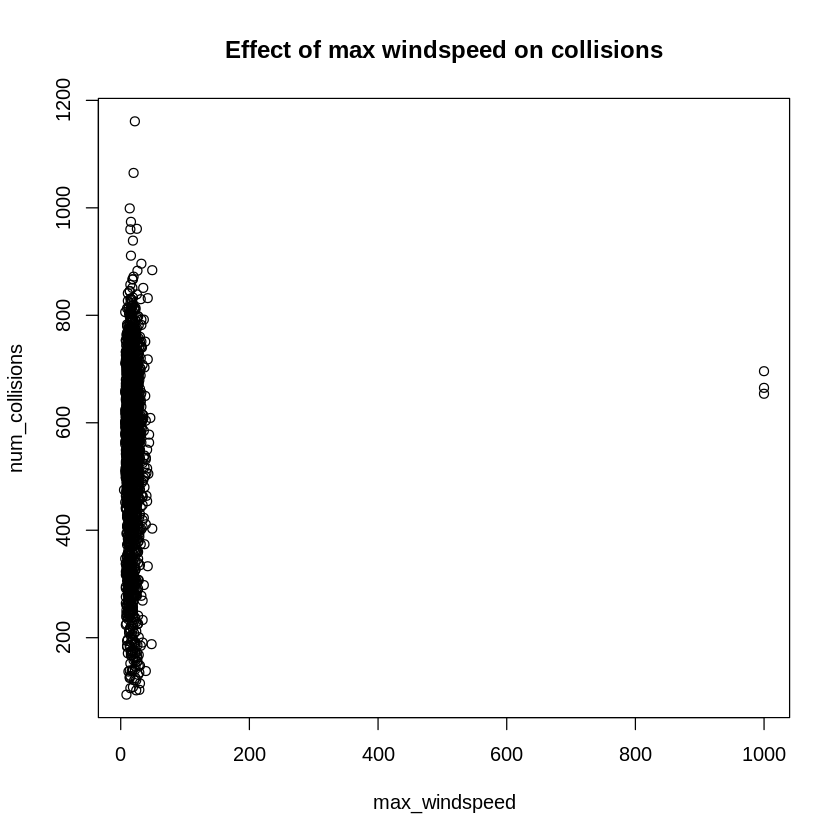

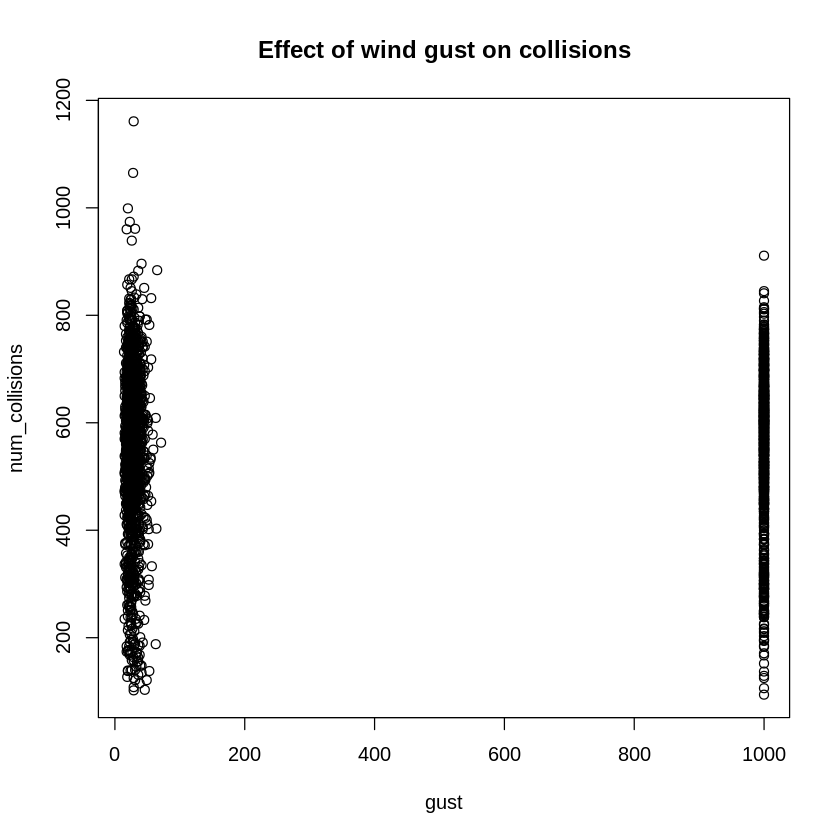

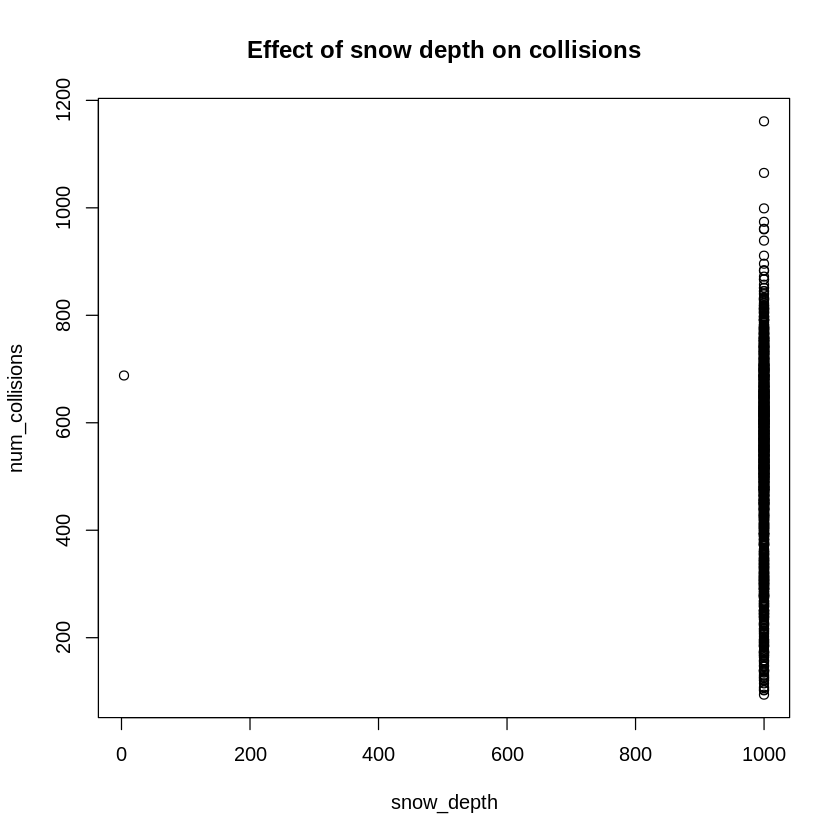

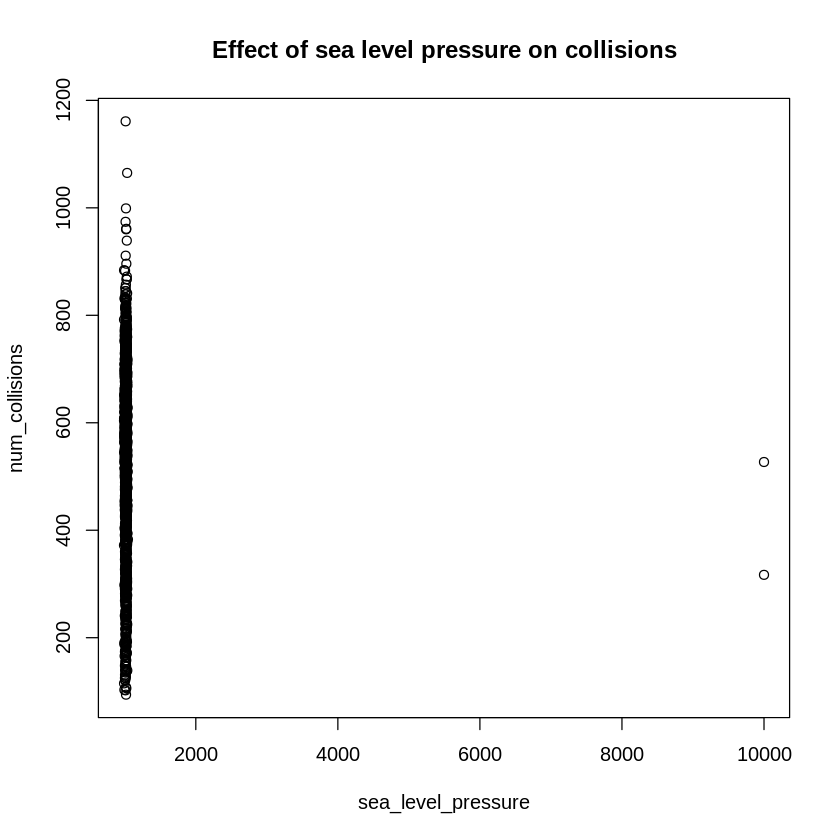

In [28]:
# plotting those values into a scatter plot
plot(dewp, num_collisions, main="Effect of dew point on collisions")
plot(percipitation, num_collisions, main="Effect of percipitation on collisions")
plot(max_windspeed, num_collisions, main="Effect of max windspeed on collisions")
plot(gust, num_collisions, main="Effect of wind gust on collisions")
plot(snow_depth, num_collisions, main="Effect of snow depth on collisions")
plot(sea_level_pressure, num_collisions, main="Effect of sea level pressure on collisions")

##**Plotting the Missing Values & Analysis**
**Snow Depth**  
According to the snow depth scatterplot there is only recorded data point plotted just above 0 in snow depth. It does however look as if there are large amounts of snow recorded therefor it appears that snow directly affects the number of collisions on a given day. However from analysing the dataset this is untrue as it is just missing recorded values of 999.9.

**Percipitation**  
**Sea Level Pressure**   
**Dew Point**  
**Max Wind Speed & Wind Gust**  

The plan is to try and tackle each of these values one a time to save any confusion. Beginning with snow depth, all he recorded values of 999.9 will be replaced with 0's to analyse the effect it would have on the graphs.

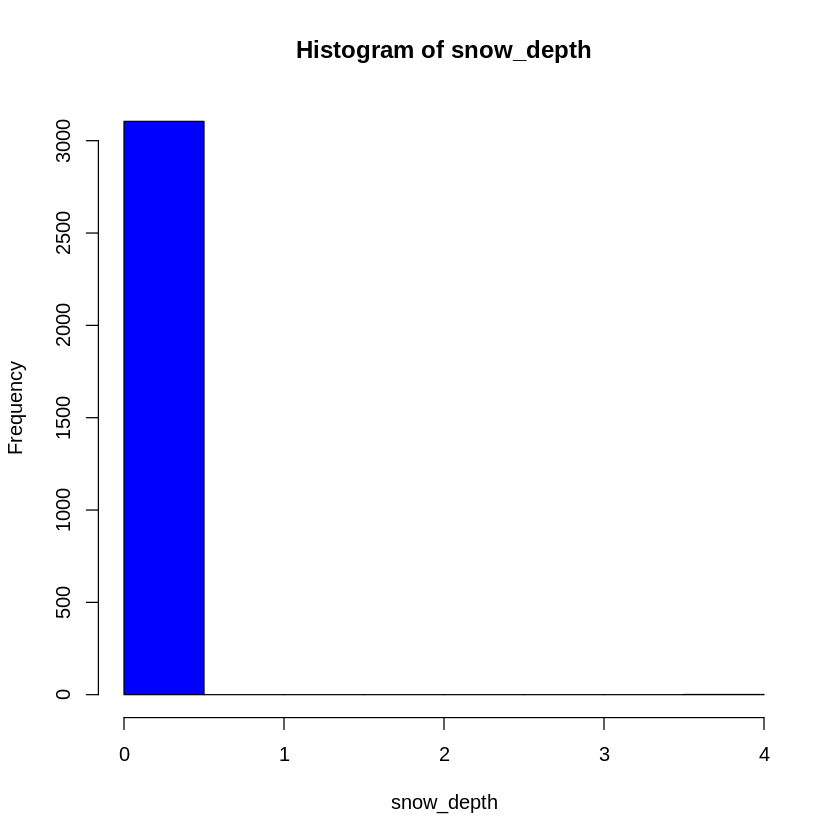

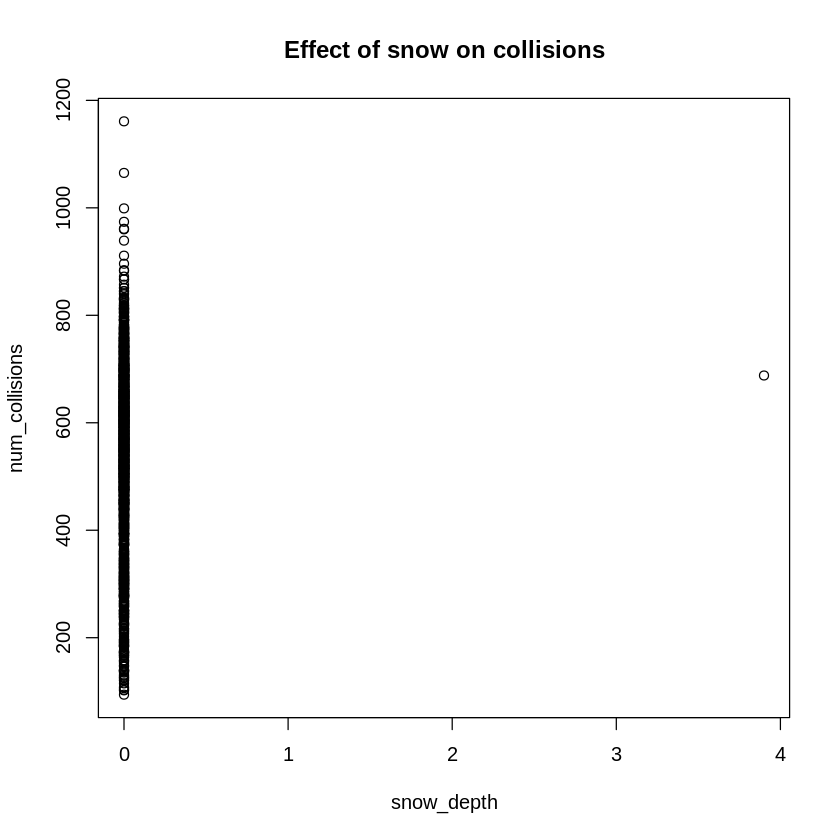

In [ ]:
# loaded a new dataset (copy - leaving the original unedited)
# where values for snowdepth have been replaced with 0 where they where 999.9 previously as an example

snow_data <- read.csv('https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/cleaned_data/collated_data_cleaned_Vsndp.csv')
snow_depth <- snow_data$sndp
num_collisions <- snow_data$num_collisions
hist(snow_depth, breaks=10, col="blue")
plot(snow_depth, num_collisions, main="Effect of snow on collisions")

more accurate - bla bla



-> write about sql queries here etc

Furthermore, the values stored in the weather dataset, specifically temperature are stored as Farenheit, therefore a small calculation is needed to convert from Farenheit to Celcius:

```
C = (F - 32) x 5/9

```

In [ ]:
data_v2 <-read.csv('https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/cleaned_data/collated_data_cleaned_v2.csv')
str(data_v2)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

'data.frame':	3106 obs. of  18 variables:
 $ day           : int  7 1 2 3 4 5 6 7 1 2 ...
 $ year          : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ mo            : int  7 7 7 7 7 7 7 7 7 7 ...
 $ da            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ collision_date: chr  "01/07/2012" "02/07/2012" "03/07/2012" "04/07/2012" ...
 $ temp          : num  83.6 80.3 79.8 81.8 86.7 81.9 84.9 80.6 78.5 76.5 ...
 $ dewp          : num  63 54.1 56.7 65.6 64.3 62.3 65.9 65.5 56.8 56.3 ...
 $ slp           : num  1009 1012 1013 1009 1007 ...
 $ visib         : num  9.7 10 10 9.2 9.4 10 9.5 8.5 10 10 ...
 $ wdsp          : num  4.1 3.8 2.9 3.6 3.8 3.1 3.1 3.1 3.5 3.4 ...
 $ mxpsd         : num  9.9 15 12 11.1 15 9.9 14 8 9.9 9.9 ...
 $ gust          : num  18.1 999.9 999.9 999.9 999.9 ...
 $ max           : num  93 88 88 91 93.9 91 95 90 84 86 ...
 $ min           : num  66 66.9 63 68 70 66.9 70 70 68 61 ...
 $ prcp          : num  0e+00 0e+00 0e+00 6e-02 1e+02 ...
 $ sndp          

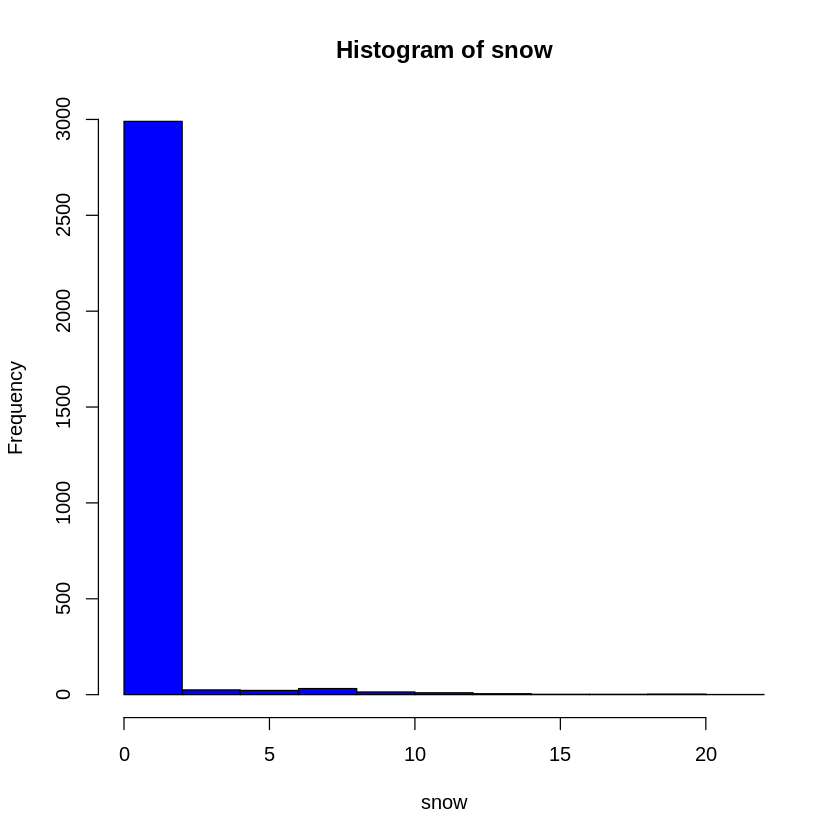

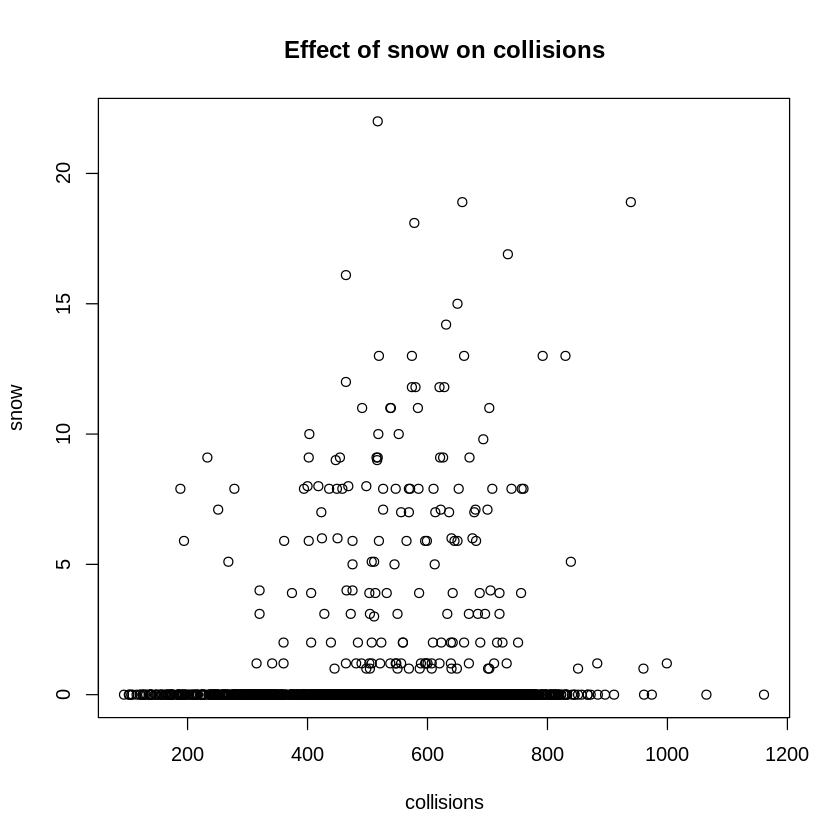

In [ ]:
snow <-data_v2$sndp
collisions <-data_v2$num_collisions

hist(snow, breaks=10, col="blue")
plot(collisions,snow, main="Effect of snow on collisions")

In [ ]:
summary(data_v2)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

Now that the snow depth attribute has been 'cleansed' and is displaying more accurate results, there is further work to be done. As mentioned previously the *prcp*, *mxpsd*, *dewp* and *gust* attributes also have missing data values. To narrow down to exactly which rows contain those values, the following queries can be used: 

```
select * from uhi-assignment1.assignment_one.collated_collision_data where prcp = 99.99 or mxpsd = '999.9' or dewp=9999.9;
```

The SQL query will return any record which has those attributes where the conditions are met. It is essentially looking for any records where the attributes have missing results.

![](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/missing_values.png?raw=true)

However, while it's good that the amount returned isn't high, it is just under 10% of the whole dataset, bearing in mind it is only searching for missing values in percipicatoin, dewp, and max windspeed. Furthermore a second query would be used to find missing values for the attribute gust such as:


```
select * from uhi-assignment1.assignment_one.collated_collision_data where gust=999.9;
```
![gust results](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/gust_results.png?raw=true)

This query will return 1137 results, which is over a 30% of the whole dataset. If this was a huge dataset it would be a negligatable amount, and could simply be removed from the final training dataset. In this case, this dataset is relatively small and the models would require alot of data to increase their potential and their accuracy.

Upon further inspect of the dataset summary, the *slp* attribute has a max value of 10000.0 which means any actual missing values will be hidden under than value within the dataset. According to the schema, missing values are recorded at 9999.9. Therefor to find any records with missing values the following query will be executed:

```
select * from  uhi-assignment1.assignment_one.collated_collision_data where slp > 9000;

```

Which returns the following results:

![slp results](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/images/slp_results.png?raw=true)

The SQL returns only two records, therefor there isn't a required need to download an excel sheet to further analyse as its relatively small. 


Both queries will be saved locally to further analyise and can be found on github:

- [missing values - gust](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/uncleaned_data/missing_values_gust.csv)
- [missing values - prcp, dewp, mxpsd](https://github.com/Behls/data-anayltics-uhi/blob/main/assignment%20one/uncleaned_data/mising_values_prcp_mxpsd_dewp.csv)

In [ ]:
# loading the final cleaned dataset back into the notebook to analyse further

final <-read.csv('https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/cleaned_data/collated_data_cleaned_final.csv')
summary(final)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp            slp      
 Length:3106        Min.   : 5.80   Min.   :-6.70   Min.   : 989  
 Class :character   1st Qu.:41.20   1st Qu.:32.60   1st Qu.:1012  
 Mode  :character   Median :52.50   Median :45.70   Median :1017  
                    Mean   :52.25   Mean   :44.68   Mean   :1017  
                    3rd Qu.:64.70   3rd Qu.:59.10   3rd Qu.:1022  
                    Max.   :86.70   Max.   :74.10   Max.   :1046  
     visib             wdsp           mxpsd            gust      
 Min.   : 

##Data Cleansing Results


In [6]:
#loading in the final dataset that has been cleaned.

cleaned_data <- read.csv('https://raw.githubusercontent.com/Behls/data-anayltics-uhi/main/assignment%20one/cleaned_data/collated_data_cleaned_final.csv')
head(cleaned_data)
summary(cleaned_data)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,num_collisions
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,4,2020,12,31,31/12/2020,57.4,56.2,1024.4,2.0,5.6,8.9,0.0,69.1,53.1,0.00,0,1,278
2,3,2020,12,30,30/12/2020,73.8,65.7,1015.8,8.3,10.1,15.0,25.1,81.0,66.9,0.00,0,0,238
3,2,2020,12,29,29/12/2020,65.0,63.4,1013.5,6.6,12.0,17.1,27.0,68.0,62.6,0.05,0,0,244
4,1,2020,12,28,28/12/2020,68.8,60.1,1013.0,9.4,7.6,11.1,24.3,79.0,59.0,0.00,0,0,217
5,7,2020,12,27,27/12/2020,63.5,61.3,1011.9,2.3,5.0,11.1,24.3,75.9,59.0,0.00,0,1,184
6,6,2020,12,26,26/12/2020,35.2,21.7,1011.2,10.0,8.9,15.0,22.0,37.9,30.0,0.00,0,0,226


      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp            slp      
 Length:3106        Min.   : 5.80   Min.   :-6.70   Min.   : 989  
 Class :character   1st Qu.:41.20   1st Qu.:32.60   1st Qu.:1012  
 Mode  :character   Median :52.50   Median :45.70   Median :1017  
                    Mean   :52.25   Mean   :44.68   Mean   :1017  
                    3rd Qu.:64.70   3rd Qu.:59.10   3rd Qu.:1022  
                    Max.   :86.70   Max.   :74.10   Max.   :1046  
     visib             wdsp           mxpsd            gust      
 Min.   : 

#Part Two - Assignment
The next section of the assignment will be hosted in another notebook with a Python Kernal instead of using R. It will include further sections of the report including: 

- Performance Measuring
- Training Models and Neural Networks
- Results & Analysis 
- Conclusion to the Project.

It can be found here: [Notebook](https://colab.research.google.com/drive/1etM8FckBH2atSApO31sX5iq2i0mEArm4#scrollTo=hEoqBO6oOHW4)

##Resources

- [W3Schools - R Syntax](htww.w3schools.com/r/default.asp)
- [National Centres for Enviromental Information - NOAA - Additional Snow Data for 2014-2020](https://www.ncei.noaa.gov/access/monitoring/daily-snow/)
- [National Weather Service - Additional Snow Data for 2012-2014](https://www.weather.gov/wrh/Climate?wfo=okx)
- [Weather Underground - historical weather data example](https://www.wunderground.com/history/daily/KLGA/date/2015-1-20)


##List of Figures
1. MetOffice. (2023). *Example of weather forecast.* [Online]. Available at: https://www.metoffice.gov.uk/weather/forecast/gfj9tt#?nearestTo=your%20detected%20location&date=2023-04-16 [Accessed on 15th April 2023]
2. Omni Calculator. (2023) *How to Calculate Relative Humidity* [Online]. Available at: https://www.omnicalculator.com/physics/relative-humidity [Accessed on 19th April 2023]

##Reference List

- Vanderplas, J. (2016). *IPython Magic Commands* [Online]. Available at: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.03-Magic-Commands.ipynb [Accessed on 29th March 2023]

- Met Office. (2023) *How does snow form?* [Online]. Available at: https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/snow/how-does-snow-form [Accessed on 6th April 2023]

- Kim, J. (2020) *The Biggest Snowstorm in Years Blanketed New York* [Online].Available at: https://www.nytimes.com/2020/12/18/nyregion/snowstorm-nyc.html [Accessed on 7th April 2023]

- National Weather Service. (2023) *Cooperative Observer Programme* [Online]. Available at: https://www.weather.gov/coop/Overview [Accessed on 7th April 2023]

- Rutledge, *et al*. (2022) *Weather.* [Online]. Available at:https://education.nationalgeographic.org/resource/weather/ [Accessed on 15th April 2023] 

- Arizona State University. (2023). *World: Lowest Sea Level Air Pressure (excluding tornadoes*[Online]. Available at: https://wmo.asu.edu/content/world-lowest-sea-level-air-pressure-excluding-tornadoes [Accessed on 15th April 2023]

- Mount Washington Observatory. (2023) *World Record Wind* [Online]. Available at: https://www.mountwashington.org/about-us/history/world-record-wind.aspx [Accessed on 15th April 2023]

- Arizona State University. (2023). *World: Highest Sea Level Air Pressure Below 700m*[Online]. Available at: https://wmo.asu.edu/content/world-highest-sea-level-air-pressure-below-700m [Accessed on 19th April 2023]

- National Weather Service. (2023) *Dew Point vs Humidity* [Online]. Available at: https://www.weather.gov/arx/why_dewpoint_vs_humidity [Accessed on 19th April 2023]

- Adame, E. (2020) *The Difference Between Wind Speed and Wind Gusts* [Online]. Available at: https://www.ny1.com/nyc/all-boroughs/weather/2020/08/07/all-wind-is-not-created-equal [Accessed on 19th April 2023]

- National Georgraphic. (2023) *Precipitation* [Online]. Available at: https://education.nationalgeographic.org/resource/precipitation/ [Accessed on 19th April 2023]

